In [1]:
# !pip install numpy --upgrade
# !pip install numpy==1.16.5
# print(np.__version__)

# !pip install pandas --upgrade
# print(pd.__version__)

In [2]:
from pandas import Series
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import f_classif, mutual_info_classif
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc, roc_auc_score, roc_curve

C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
train = pd.read_csv(r"C:\Users\Alexey\Desktop\python_and_data_an\компьютер говорит нет\train.csv")

(array([64427.,     0.,     0.,     0.,     0.,     0.,     0.,     0.,
            0.,  9372.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

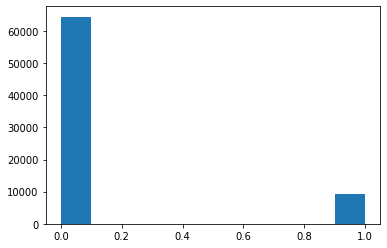

In [4]:
# train["default"].unique()
plt.hist(train["default"])

In [5]:
train

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73492 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

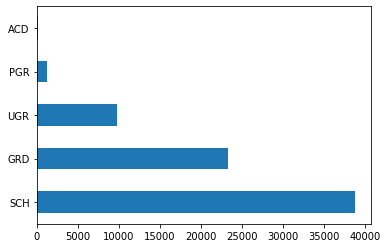

In [7]:
train["education"].value_counts().plot.barh()

In [8]:
train[pd.isnull(train["education"])]

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
517,53844,03MAR2014,NaN,F,54,N,N,0,0,-2.781669,0,80,2,3,20000,1,4,Y,0
725,4918,11JAN2014,NaN,M,57,N,N,0,0,-2.186115,0,40,1,2,10000,1,4,N,0
1393,80738,28MAR2014,NaN,F,55,N,N,0,0,-2.062910,3,40,1,2,30000,1,4,N,0
1564,5925,13JAN2014,NaN,F,35,N,N,0,1,-2.023590,1,50,2,3,45000,1,3,N,1
1739,9175,16JAN2014,NaN,F,43,Y,N,0,0,-1.891956,0,50,2,3,9000,4,1,N,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72694,28025,04FEB2014,NaN,M,22,Y,N,0,0,-2.117309,1,70,2,3,22000,4,1,N,0
72705,100777,17APR2014,NaN,F,58,N,N,0,0,-2.267773,3,50,2,3,10000,4,1,N,0
72903,10917,18JAN2014,NaN,F,47,N,N,0,0,-2.214084,0,50,2,3,15000,1,4,N,0
73087,102635,20APR2014,NaN,F,56,N,N,0,0,-2.369820,6,80,2,3,12000,1,4,N,0


In [9]:
dictionary_names = {}
n = 0
for name in train["education"].unique():
    dictionary_names[name] = np.int64(n)
    n += 1
dictionary_names

{'SCH': 0, 'GRD': 1, 'UGR': 2, 'PGR': 3, 'ACD': 4, nan: 5}

In [10]:
train_1 = train.copy()
for i in range(0, len(train_1)):
    train_1["education"][i] = dictionary_names[train_1["education"][i]]

C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [11]:
train

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


###### Рассмотрим, от чего может зависить уровень образования

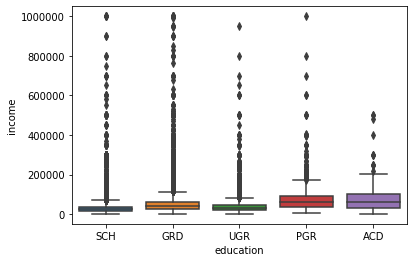

In [12]:
sns.boxplot(y = 'income', x = 'education', data=train)
#Странно, но не видно особой связи с доходом

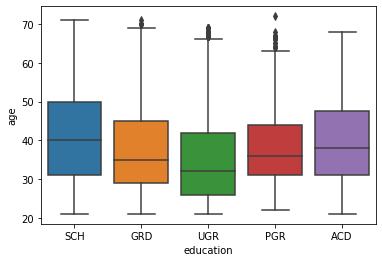

In [13]:
sns.boxplot(y = 'age', x = 'education', data=train)

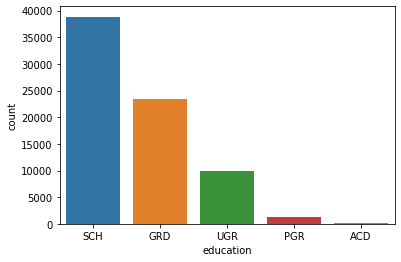

In [14]:
# stud.age.describe()
sns.countplot(train.education)
# Самое часто встречающееся - школьное

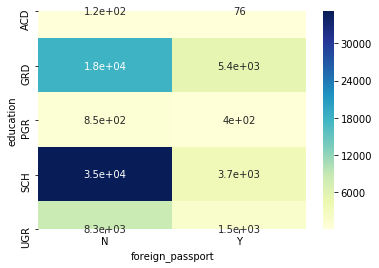

In [15]:
sns.heatmap(pd.crosstab(train['education'], train['foreign_passport']), annot = True, cmap="YlGnBu")

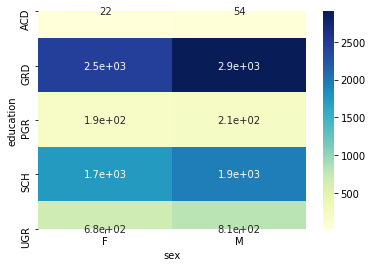

In [16]:
sns.heatmap(pd.crosstab(train[train['foreign_passport'] == "Y"]['education'], train[train['foreign_passport'] == "Y"]['sex']), annot = True, cmap="YlGnBu")

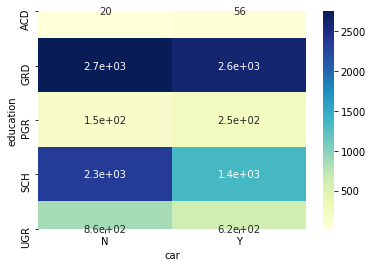

In [17]:
sns.heatmap(pd.crosstab(train[train['foreign_passport'] == "Y"]['education'], train[train['foreign_passport'] == "Y"]['car']), annot = True, cmap="YlGnBu")

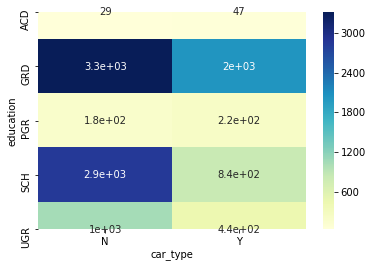

In [18]:
sns.heatmap(pd.crosstab(train[train['foreign_passport'] == "Y"]['education'], train[train['foreign_passport'] == "Y"]['car_type']), annot = True, cmap="YlGnBu")

Короче, если это человек без иностранного паспорта, то это SCH. Если иностранный паспорт есть, то смотрим на наличие иномарки и пол. Если иномарки нет и это мужчина или иномарка есть, то ставим GRD. Если иномарки нет, и это женщина, то ставим SCH. Не идеально, но сойдёт, благо, пропусков не так уж и много.

In [19]:
def give_education(df, i):
    education = "SCH"
    if df["foreign_passport"][i] == "Y":
        if df["car_type"][i] == "Y":
            education = "GRD"
        if df["car_type"][i] == "N" and df["sex"][i] == "M":
            education = "GRD"
    return education

for i in range(0, len(train)):
    if train["education"].isna()[i]:
        train["education"][i] = give_education(train, i)

C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [20]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73799 entries, 0 to 73798
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   client_id         73799 non-null  int64  
 1   app_date          73799 non-null  object 
 2   education         73799 non-null  object 
 3   sex               73799 non-null  object 
 4   age               73799 non-null  int64  
 5   car               73799 non-null  object 
 6   car_type          73799 non-null  object 
 7   decline_app_cnt   73799 non-null  int64  
 8   good_work         73799 non-null  int64  
 9   score_bki         73799 non-null  float64
 10  bki_request_cnt   73799 non-null  int64  
 11  region_rating     73799 non-null  int64  
 12  home_address      73799 non-null  int64  
 13  work_address      73799 non-null  int64  
 14  income            73799 non-null  int64  
 15  sna               73799 non-null  int64  
 16  first_time        73799 non-null  int64 

In [21]:
train

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,M,62,Y,Y,0,0,-2.008753,1,50,1,2,18000,4,1,N,0
1,63161,12MAR2014,SCH,F,59,N,N,0,0,-1.532276,3,50,2,3,19000,4,1,N,0
2,25887,01FEB2014,SCH,M,25,Y,N,2,0,-1.408142,1,80,1,2,30000,1,4,Y,0
3,16222,23JAN2014,SCH,F,53,N,N,0,0,-2.057471,2,50,2,3,10000,1,3,N,0
4,101655,18APR2014,GRD,M,48,N,N,0,1,-1.244723,1,60,2,3,30000,1,4,Y,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73794,54887,04MAR2014,GRD,F,45,N,N,0,0,-1.792064,3,50,1,2,17000,4,4,N,0
73795,76821,24MAR2014,SCH,M,41,Y,Y,0,0,-2.058029,1,50,2,2,70000,1,4,N,0
73796,103695,22APR2014,SCH,M,31,N,N,0,0,-1.512635,4,80,2,3,45000,2,2,N,0
73797,861,04JAN2014,SCH,F,29,N,N,0,1,-1.479334,3,50,1,3,13000,2,3,N,1


In [22]:
# По-нормальному

bin_cols = ['sex', 'car', 'car_type', 'foreign_passport', 'good_work']

cat_cols = ['education', 'home_address', 'work_address']

num_cols = ['age', 'decline_app_cnt', 'income', 'bki_request_cnt']

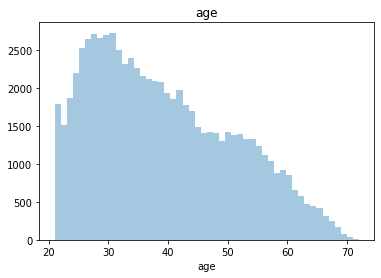

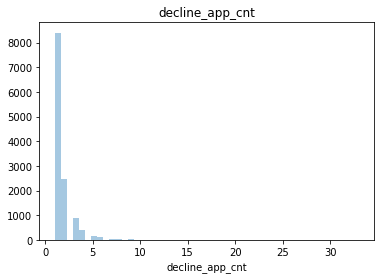

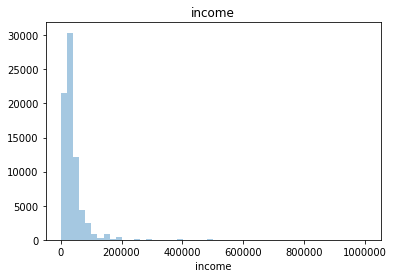

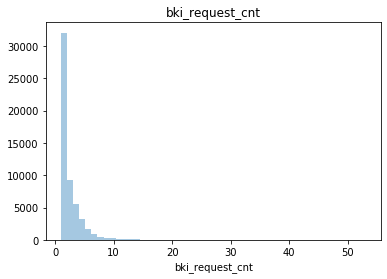

In [23]:
for i in num_cols:
    plt.figure()
    sns.distplot(train[i][train[i] > 0].dropna(), kde = False, rug=False)
    plt.title(i)
    plt.show()

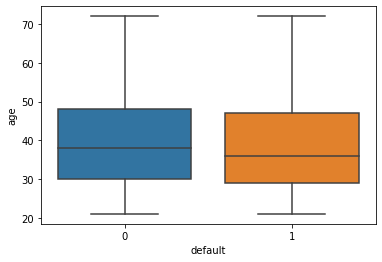

In [24]:
sns.boxplot(y = 'age', x = 'default', data=train)

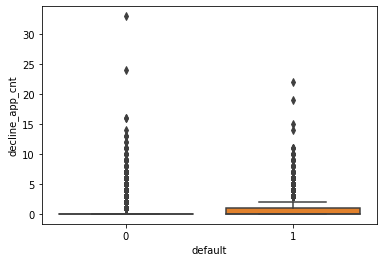

In [25]:
sns.boxplot(y = 'decline_app_cnt', x = 'default', data=train)

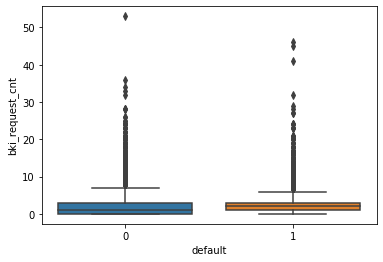

In [26]:
sns.boxplot(y = 'bki_request_cnt', x = 'default', data=train)

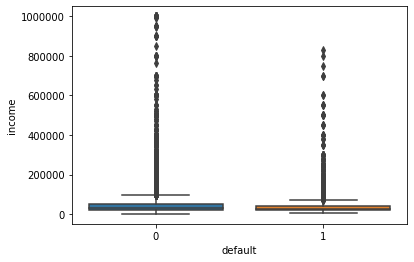

In [27]:
sns.boxplot(y = 'income', x = 'default', data=train)

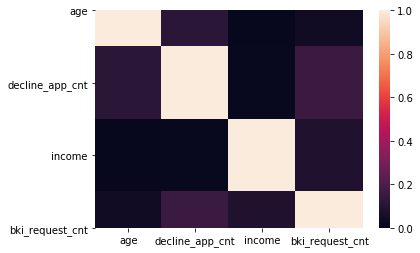

In [28]:
# Корреляция Пирсона
sns.heatmap(train[num_cols].corr().abs(), vmin=0, vmax=1)

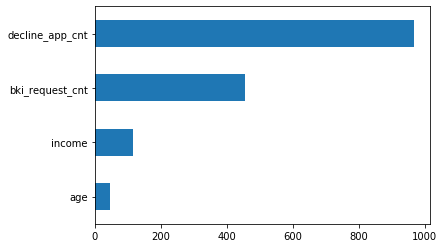

In [29]:
imp_num = pd.Series(f_classif(train[num_cols], train['default'])[0], index = num_cols)
imp_num.sort_values(inplace = True)
imp_num.plot(kind = 'barh')

In [30]:
label_encoder = LabelEncoder()

mapped_education = pd.Series(label_encoder.fit_transform(train['sex']))
print(dict(enumerate(label_encoder.classes_)))

{0: 'F', 1: 'M'}


In [31]:
# Для бинарных признаков мы будем использовать LabelEncoder

label_encoder = LabelEncoder()

for column in bin_cols:
    train[column] = label_encoder.fit_transform(train[column])
    
# убедимся в преобразовании    
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,SCH,1,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,0
1,63161,12MAR2014,SCH,0,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,0
2,25887,01FEB2014,SCH,1,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,0
3,16222,23JAN2014,SCH,0,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,0
4,101655,18APR2014,GRD,1,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,0


In [32]:
label_encoder = LabelEncoder()
train["education"] = label_encoder.fit_transform(train["education"])
train.head()

,client_id,app_date,education,sex,age,car,car_type,decline_app_cnt,good_work,score_bki,bki_request_cnt,region_rating,home_address,work_address,income,sna,first_time,foreign_passport,default
0,25905,01FEB2014,3,1,62,1,1,0,0,-2.008753,1,50,1,2,18000,4,1,0,0
1,63161,12MAR2014,3,0,59,0,0,0,0,-1.532276,3,50,2,3,19000,4,1,0,0
2,25887,01FEB2014,3,1,25,1,0,2,0,-1.408142,1,80,1,2,30000,1,4,1,0
3,16222,23JAN2014,3,0,53,0,0,0,0,-2.057471,2,50,2,3,10000,1,3,0,0
4,101655,18APR2014,1,1,48,0,0,0,1,-1.244723,1,60,2,3,30000,1,4,1,0


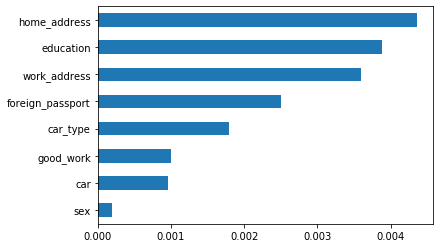

In [33]:
imp_cat = Series(mutual_info_classif(train[bin_cols + cat_cols], train['default'],
                                     discrete_features =True), index = bin_cols + cat_cols)
imp_cat.sort_values(inplace = True)
imp_cat.plot(kind = 'barh')

# Подготовка к машинному обучению

In [34]:
# One Hot Encoding
X_cat = OneHotEncoder(sparse = False).fit_transform(train[cat_cols].values)

C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [35]:
len(X_cat[0])

11

In [36]:
# Стандартизация числовых переменных

X_num = StandardScaler().fit_transform(train[num_cols].values)

In [37]:
# Объединяем

X = np.hstack([X_num, train[bin_cols].values, X_cat])
Y = train['default'].values

In [38]:
# Подготовка признаков для модели завершена. 

In [39]:
# Разделим данные для обучения следующим образом:

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [40]:
# X, y = load_iris(return_X_y=True)
clf = LogisticRegression().fit(X_train, y_train)
y_pred = clf.predict(X_test)

C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


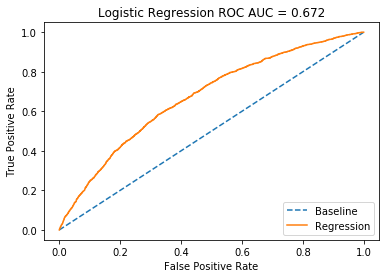

In [41]:
model = LogisticRegression()
model.fit(X_train, y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]


fpr, tpr, threshold = roc_curve(y_test, probs)
roc_auc = roc_auc_score(y_test, probs)

plt.figure()
plt.plot([0, 1], label='Baseline', linestyle='--')
plt.plot(fpr, tpr, label = 'Regression')
plt.title('Logistic Regression ROC AUC = %0.3f' % roc_auc)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc = 'lower right')
plt.show()

In [42]:
from sklearn.model_selection import GridSearchCV

# Добавим типы регуляризации
penalty = ['l1', 'l2']

# Зададим ограничения для параметра регуляризации
C = np.logspace(0, 4, 10)

# Создадим гиперпараметры
hyperparameters = dict(C=C, penalty=penalty)

model = LogisticRegression()
model.fit(X_train, y_train)

# Создаем сетку поиска с использованием 5-кратной перекрестной проверки
clf = GridSearchCV(model, hyperparameters, cv=5, verbose=0)

best_model = clf.fit(X_train, y_train)

# View best hyperparameters
print('Лучшее Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Лучшее C:', best_model.best_estimator_.get_params()['C'])

C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Othe

C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Othe

C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Other\Anaconda_2019Download\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Programs_Mine_Different_Else_Othe

Лучшее Penalty: l1
Лучшее C: 1.0
